# Plotting Notebook.

Subsequent code frame loads all important variables for us to play with

In [80]:
import matplotlib.pyplot
import matplotlib.pyplot as plt
import seaborn as sns

from benchmark.benchmark_validators import BenchmarkRun
from benchmark.config import get_config
from benchmark.results_processing import load_benchmark_run, create_dataframe, print_statistics

# Get the config from the config factory. (If you don't have a config, consider instantiating a config object here)
# config = BenchmarkConfig(...)
config = get_config()

# filename = "2025-06-09/pcbm_20250609-160559_YfMFhLG8S70lT0b0uyjIbpQ5LO5mUeqes8VT9ZIhjFs=.json"

# Inline VS No Inline No Burn in. Algo RB_GS
# filename = "2025-06-12/pcbm_20250612-090840_W_OGndEVkfDbsBaitgK_DLwbQpkxDbD6LKJ2Mg5P25k=.json"

# Inline VS No Inline Burn In Algo RB_GS
# filename = "2025-06-13/pcbm_20250613-133542_ysNOGFiq8dXaph0kQ7vASjTpXfW_8mw05zNDtmZgRo8=.json"

# rb_gs vx gs vs jacobi
# filename = "2025-06-14/pcbm_20250614-205441_rFJAmJMqkKWMDI-NyoZEp7L2EgeQ2NJ5HhVfje20d-U=.json"

# rb_gs vs gs vs jacobi
# filename = "2025-06-14/pcbm_20250614-212726_5vzYE8r6XVjNk5sBQG0KQAPFk7jeD6F2SsEqKI2dvvI=.json"

# rb_gs vs gs vs jacobi
# filename = "2025-06-14/pcbm_20250614-220618_uORoarKSf1VlnYbxYg_RiMK57u-Kt6uGBjL8UAw9cXM=.json"

filename = "2025-06-13/pcbm_20250613-140721_Lxkir43FCJ3g-AEV-cgyNdufuv_h3hSQR8QzcOAMFJw=.json"

bmr: BenchmarkRun = load_benchmark_run(config=config, path=filename)
bmr_dtf = create_dataframe(bmr)
bmr_dtf = bmr_dtf.query("nx > 64 and ny > 64")

# Set interactive plotting mode
matplotlib.pyplot.ion()

Prepare some common plots

In [71]:
# Module VS Runtimeny:
bmr_dtf["group-cpu-nx-ny"] = bmr_dtf.apply(lambda row: f"cpu:{row.cpu_count} dim:{row.nx} x {row.ny}", axis=1)
bmr_dtf["group-module-nx-ny"] = bmr_dtf.apply(lambda row: f"module:{row.module} dim:{row.nx} x {row.ny}", axis=1)
bmr_dtf["dim"] = bmr_dtf.apply(lambda row: f"dim: {row.nx} x {row.ny}", axis=1)
bmr_dtf["group-module-cpu"] = bmr_dtf.apply(lambda row: f"module:{row.module} cpu:{row.cpu_count}", axis=1)


In [72]:
_ = print_statistics(run=bmr)

Benchmark Results of VX Benchmark
Module                 cpu_count    nx    ny    runtime std:    runtime avg    runtime std norm:    runtime avg norm    number of samples
-------------------  -----------  ----  ----  --------------  -------------  -------------------  ------------------  -------------------
vx.base_vx_jacobi              8   128   128     5.31487e-05     0.00277287          2.53433e-11         1.32221e-09                   15
vx.base_vx_jacobi              8   256   256     0.000863159     0.00675747          1.02897e-10         8.05553e-10                   15
vx.base_vx_jacobi              8   512   512     0.000715985     0.0250206           2.1338e-11          7.45672e-10                   15
vx.base_vx_jacobi              8  1024  1024     0.0186977       0.267862            1.39308e-10         1.99573e-09                   15
vx.base_vx_jacobi              8  2048  2048     0.033716        1.65859             6.28009e-11         3.08937e-09                   15


In [73]:
print(bmr_dtf.columns)

Index(['cpu_count', 'module', 'benchmark_type', 'max_iter', 'nx', 'ny',
       'cache_bs_1', 'cache_bs_2', 'sample', 'duration', 'normalized_duration',
       'name', 'group-cpu-nx-ny', 'group-module-nx-ny', 'dim',
       'group-module-cpu'],
      dtype='object')


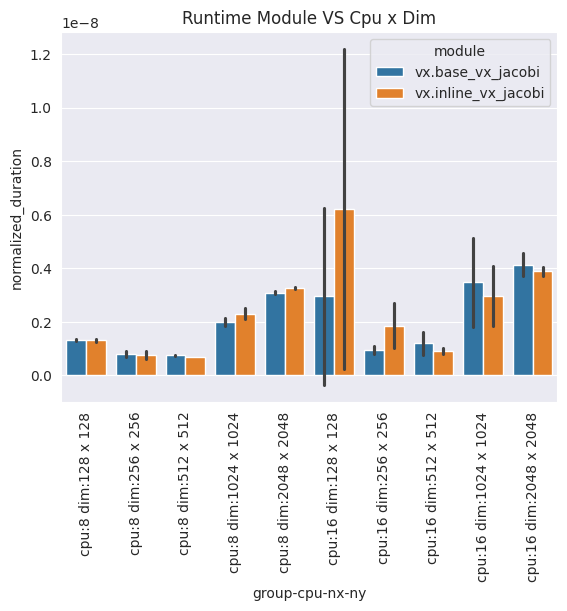

In [74]:
plt.xticks(rotation=90)

plot = sns.barplot(bmr_dtf, x="group-cpu-nx-ny", y="normalized_duration", hue="module", errorbar="sd").set_title("Runtime Module VS Cpu x Dim")
fig = plot.get_figure()

fig.savefig(f"Test.svg")


Text(0.5, 1.0, 'Runtime Module VS Dim, CPU=16')

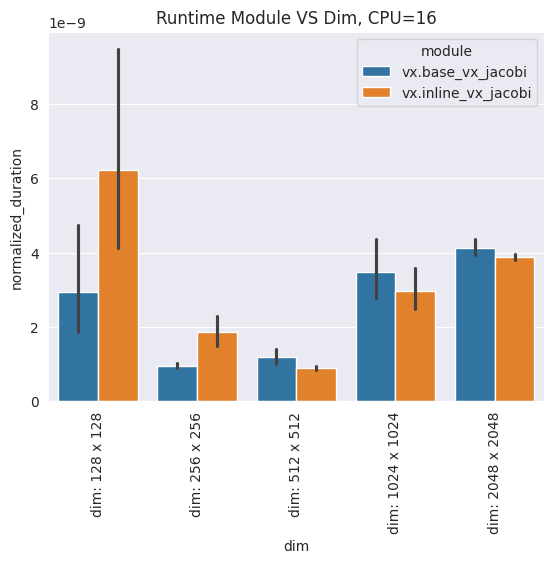

In [75]:
plt.xticks(rotation=90)
sns.barplot(bmr_dtf.query("cpu_count == 16"), x="dim", y="normalized_duration", hue="module").set_title("Runtime Module VS Dim, CPU=16")


Text(0.5, 1.0, 'Runtime Module VS Dim, CPU=8')

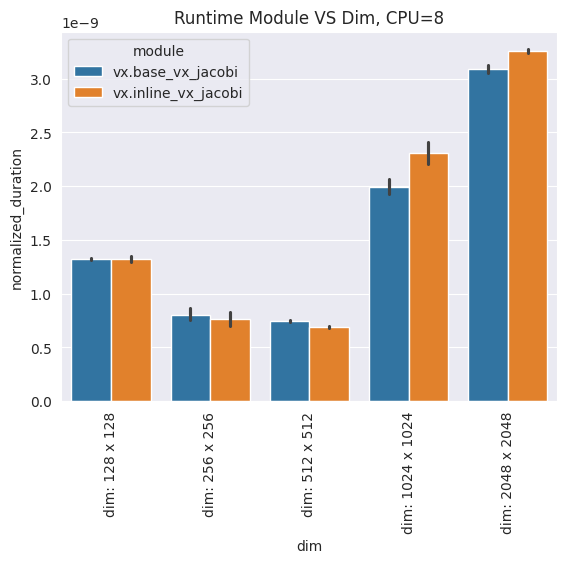

In [76]:
plt.xticks(rotation=90)
sns.barplot(bmr_dtf.query("cpu_count == 8"), x="dim", y="normalized_duration", hue="module").set_title("Runtime Module VS Dim, CPU=8")


Text(0.5, 1.0, 'Runtime CPU Count VS Module x Dim')

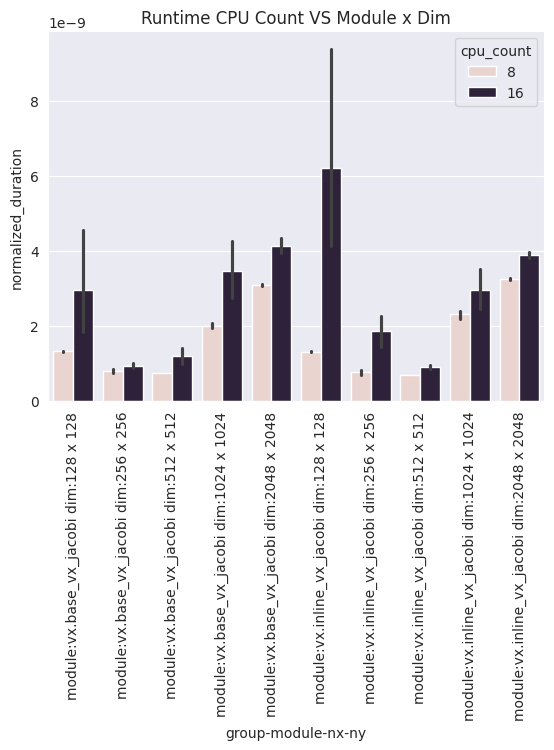

In [77]:
plt.xticks(rotation=90)
sns.barplot(bmr_dtf, x="group-module-nx-ny", y="normalized_duration", hue="cpu_count").set_title("Runtime CPU Count VS Module x Dim")
# sns.catplot(bmr_dtf, x="group-module-nx-ny", y="normalized_duration", col="cpu_count", kind="box")

Text(0.5, 1.0, 'Runtime Module x CPU vs Dim')

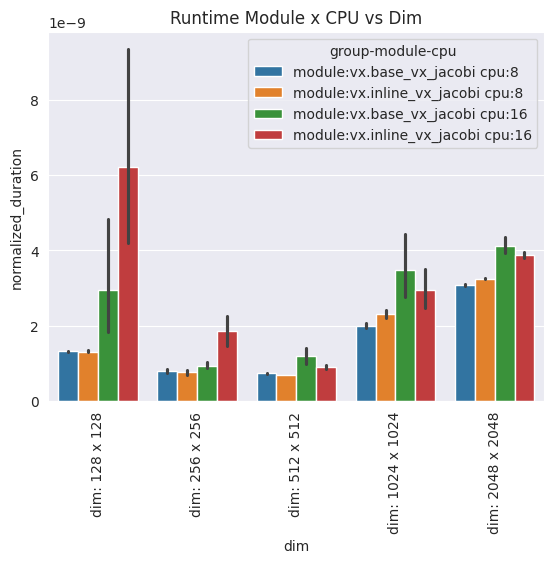

In [78]:
plt.xticks(rotation=90)
sns.barplot(bmr_dtf, x="dim", y="normalized_duration", hue="group-module-cpu").set_title("Runtime Module x CPU vs Dim")

Text(0.5, 1.0, 'Runtime Dim VS Module x CPU ')

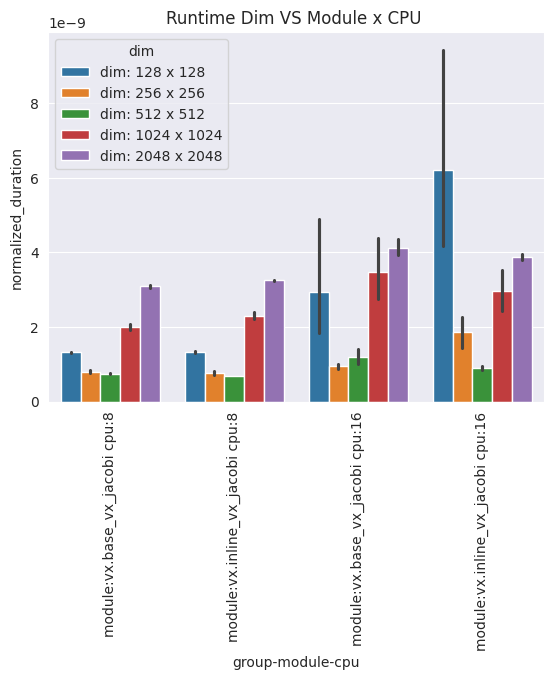

In [79]:
plt.xticks(rotation=90)
sns.barplot(bmr_dtf, x="group-module-cpu", y="normalized_duration", hue="dim").set_title("Runtime Dim VS Module x CPU ")